In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

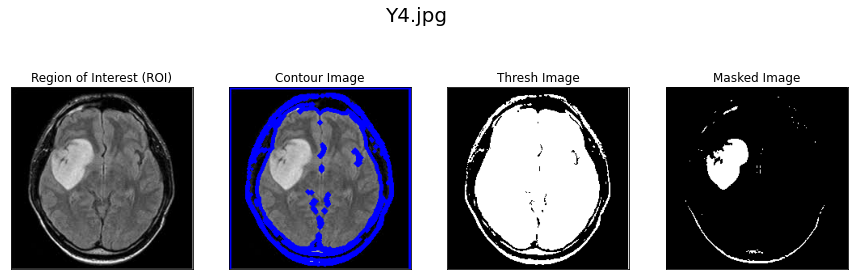

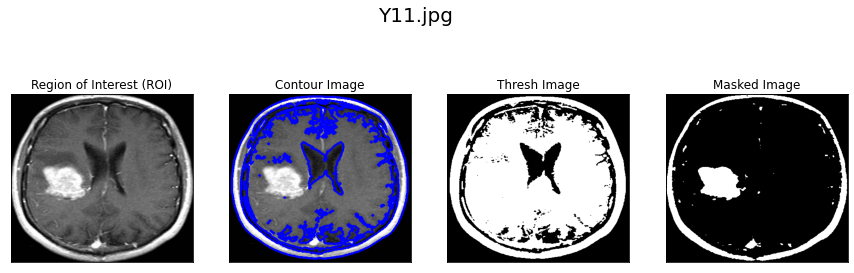

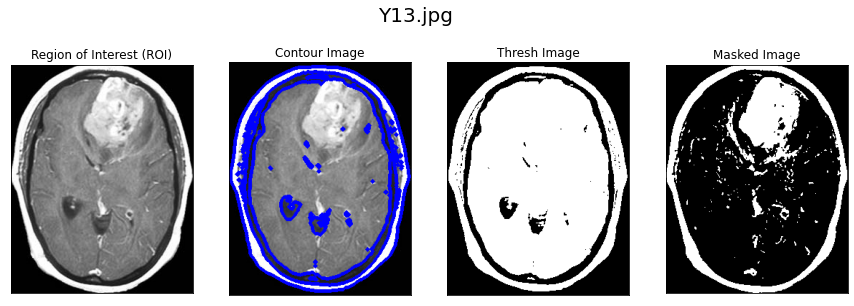

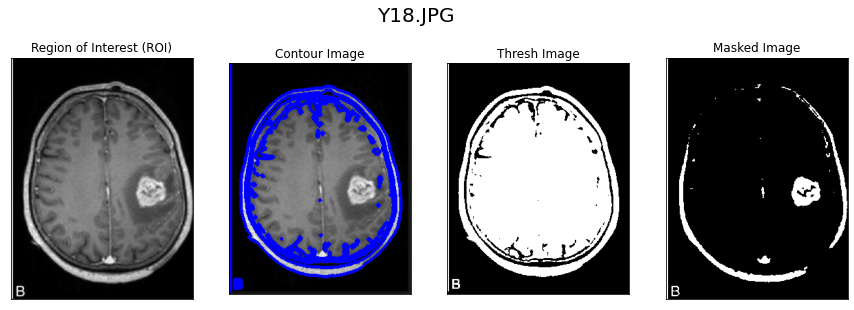

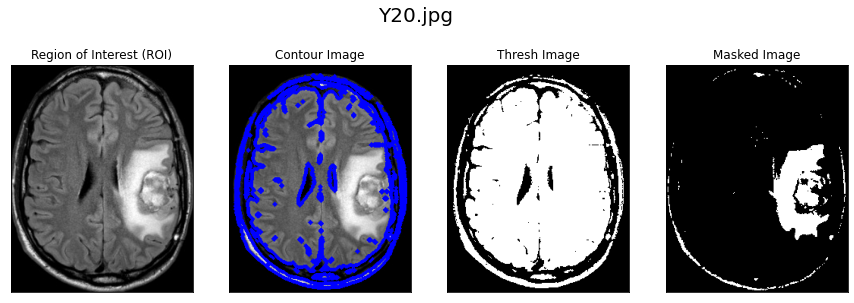

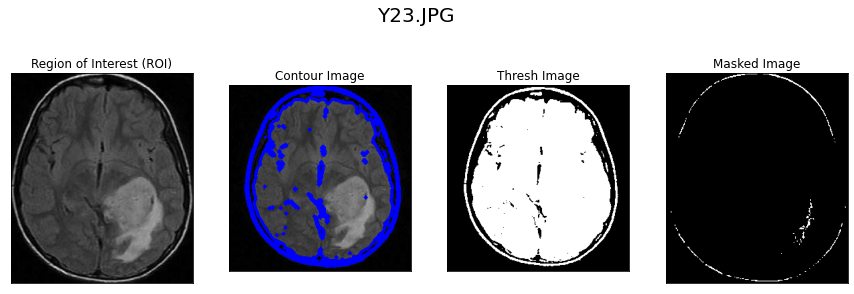

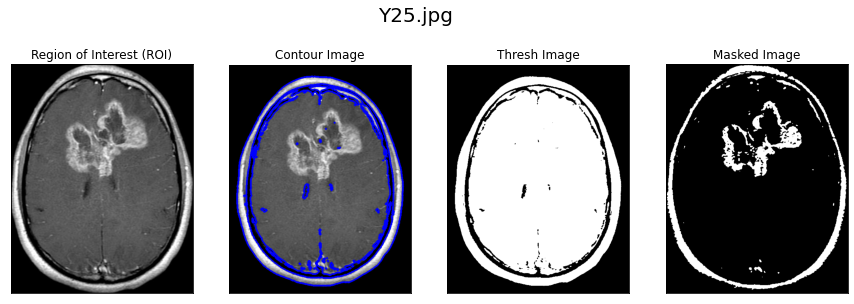

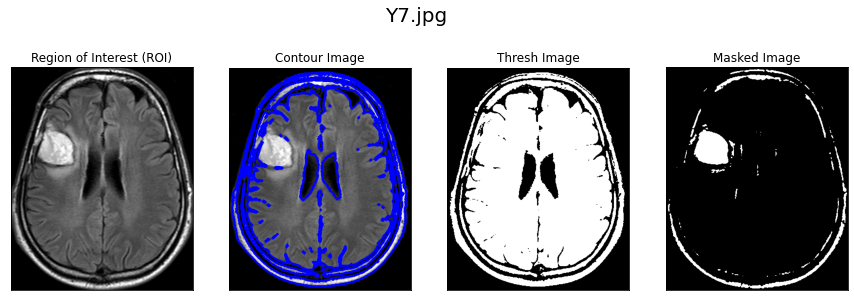

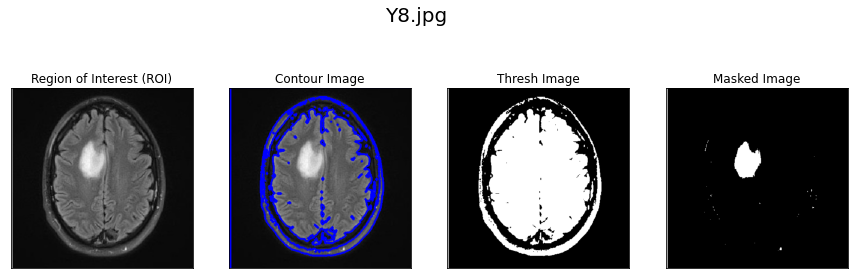

In [ ]:
list_image = ['Y4.jpg', 'Y11.jpg', 'Y13.jpg', 'Y18.JPG', 'Y20.jpg', 'Y23.JPG', 'Y25.jpg', 'Y7.jpg', 'Y8.jpg']

for i in list_image:
  # Load image, grayscale, Otsu's threshold, and extract ROI
  image = cv2.imread('/content/drive/MyDrive/PCVK/Brain Tumor/' + i)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image2 = image.copy()
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  x,y,w,h = cv2.boundingRect(thresh)
  ROI = image[y:y+h, x:x+w]
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # Color segmentation on ROI
  hsv = cv2.cvtColor(ROI, cv2.COLOR_BGR2HSV)
  lower = np.array([0, 0, 152])
  upper = np.array([179, 255, 255])
  mask = cv2.inRange(hsv, lower, upper)
  cv2.drawContours(image2, contours, -1, (0,0,255), 3)

  plt.figure(figsize=(15,5))
  plt.subplot(141),plt.imshow(ROI,cmap = 'gray')
  plt.title('Region of Interest (ROI)'), plt.xticks([]), plt.yticks([])
  plt.subplot(142),plt.imshow(image2, cmap = 'gray')
  plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(143),plt.imshow(thresh, cmap = 'gray')
  plt.title('Thresh Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(144),plt.imshow(mask, cmap = 'gray')
  plt.title('Masked Image'), plt.xticks([]), plt.yticks([])
  plt.suptitle(i, fontsize=20)
